<a href="https://colab.research.google.com/github/19521242bao/ComputerVision/blob/main/Age_Detection_Practice_Problem_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 % pylab inline
import os
import random
import shutil, sys  
import pandas as pd
import cv2
# imported all the necessary modules

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'test', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, Adamax

In [4]:
#!gdown --id  1TcgonGBNfYuCRqo3HBi-26FODgfxwkxJ
#!gdown --id  1yVnMJB4a3wcRyQnm2nt1-tkvFqJQt8CF


Downloading...
From: https://drive.google.com/uc?id=1yVnMJB4a3wcRyQnm2nt1-tkvFqJQt8CF
To: /content/test_Bh8pGW3.zip
17.0MB [00:00, 40.8MB/s]


#**Loading data**

In [5]:
!unzip train_DETg9GD.zip
!unzip test_Bh8pGW3.zip

Streaming output truncated to the last 5000 lines.
  inflating: Test/15755.jpg          
  inflating: Test/1576.jpg           
  inflating: Test/15762.jpg          
  inflating: Test/15765.jpg          
  inflating: Test/15768.jpg          
  inflating: Test/15770.jpg          
  inflating: Test/15773.jpg          
  inflating: Test/15778.jpg          
  inflating: Test/15780.jpg          
  inflating: Test/15784.jpg          
  inflating: Test/15803.jpg          
  inflating: Test/15805.jpg          
  inflating: Test/15806.jpg          
  inflating: Test/15808.jpg          
  inflating: Test/1581.jpg           
  inflating: Test/15810.jpg          
  inflating: Test/15811.jpg          
  inflating: Test/15812.jpg          
  inflating: Test/15813.jpg          
  inflating: Test/15814.jpg          
  inflating: Test/15815.jpg          
  inflating: Test/15824.jpg          
  inflating: Test/15825.jpg          
  inflating: Test/15827.jpg          
  inflating: Test/15831.jpg          

**Preparing data for train-test**

In [ ]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 160kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
import os
import random

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:

root_dir = os.path.abspath('.')


train = pd.read_csv( 'train.csv')
test = pd.read_csv('test.csv')

Age: MIDDLE


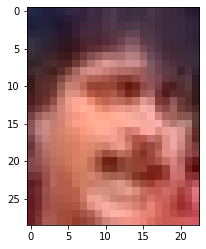

In [ ]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join('', 'Train', img_name))
plt.imshow(img)
print("Age:", train.Class[i])

In [ ]:

import numpy as np
data_dir=''
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  


In [ ]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  """


In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.
#normalize

In [ ]:
import keras
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.to_categorical(train_y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


trainAug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
trainAug.fit(X_train)
X_train.shape

(15924, 32, 32, 3)

In [ ]:
input_num_units = (32, 32, 3)

epochs = 100
batch_size = 32
#INIT_LR = 1e-5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


input_num_units = (32, 32, 3)
#hidden_num_units = 500
#output_num_units = 3

epochs = 30
batch_size = 128

model = Sequential()
model.add(Conv2D(50, (5, 5), input_shape=(input_num_units), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, (5, 5), input_shape=(input_num_units), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(30, (5, 5), input_shape=(input_num_units), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_split = 0.2)

Epoch 1/30
125/125 [==============================] - 30s 236ms/step - loss: 0.9803 - accuracy: 0.5246 - val_loss: 0.9325 - val_accuracy: 0.5439
Epoch 2/30
125/125 [==============================] - 29s 230ms/step - loss: 0.9297 - accuracy: 0.5481 - val_loss: 0.8623 - val_accuracy: 0.5909
Epoch 3/30
125/125 [==============================] - 28s 228ms/step - loss: 0.8693 - accuracy: 0.5877 - val_loss: 0.8023 - val_accuracy: 0.6529
Epoch 4/30
125/125 [==============================] - 28s 226ms/step - loss: 0.8234 - accuracy: 0.6254 - val_loss: 0.7953 - val_accuracy: 0.6396
Epoch 5/30
125/125 [==============================] - 27s 220ms/step - loss: 0.7811 - accuracy: 0.6518 - val_loss: 0.7592 - val_accuracy: 0.6708
Epoch 6/30
125/125 [==============================] - 27s 218ms/step - loss: 0.7659 - accuracy: 0.6612 - val_loss: 0.7434 - val_accuracy: 0.6783
Epoch 7/30
125/125 [==============================] - 27s 217ms/step - loss: 0.7616 - accuracy: 0.6621 - val_loss: 0.7294 - val_ac

In [ ]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('sub02.csv', index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
